# The Lorenz Attractor - By Younes Abdeldjalil TOUMI

--------------------------------

## 1. Introduction


-------------------------

## 2. Mathematical Background

The Lorenz attractor arises from a **system of ordinary differential equations** (ODEs) that describe the time evolution of a dynamical system. A dynamical system is one in which a fixed rule describes how a point in a given space evolves over time. This rule can be deterministic, meaning future states of the system are fully determined by its initial conditions.

In particular, the Lorenz attractor stems from a system that exhibits chaotic behavior, meaning it is highly sensitive to initial conditions. A property known as the "*butterfly effect*".

\begin{equation}
\boxed{
\begin{aligned}
\frac{dx}{dt} & = \sigma(y - x) \\
\frac{dy}{dt} & = x(\rho - z) - y \\
\frac{dz}{dt} & = xy - \beta z \\
\end{aligned}
}
\end{equation}

Here:
* $x(t)$ is proportional to the rate of convection,
* $y(t)$ is proportional to the horizontal temperature variation,
* $z(t)$ is proportional to the vertical temperature variation.

The parameters $\sigma$, $\rho$ and $\beta$ are constants:
* $\sigma$ is the Prandtl number (related to fluid viscosity and heat conductivity),
* $\rho$ is the Rayleigh number (related to temperature differences),
* $\beta$ is a geometric factor.

--------------------------

## 3. Implementation

##### 3.1 Importing the Libraries

In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp

The code imports essential libraries:

* `numpy` for numerical operations, especially for working with arrays.
* `matplotlib.pyplot` for generating static plots.
* `matplotlib.animation.FuncAnimation` is included to enable animations, though it is not used in the final plot.
* `scipy.integrate.solve_ivp` is the core function used for solving initial value problems for systems of ODEs.

##### 3.2 Defining Parameters for the Lorenz System

In [27]:
sigma = 10 # Prandtl number
beta = 8/3 # geometric factor
rho = 28 # Rayleigh number

Are the parameters of the Lorenz system:
* `sigma` (Prandtl number $\sigma$), `beta` (geometric factor $\beta$) and `rho` (Rayleigh number $\rho$) are set to their classical values, which lead to chaotic dynamics. These constants determine the behavior of the Lorenz equations.

##### 3.3 Defining the system of ODE's

In [28]:
def system_of_odes(t, S, sigma, beta, rho):
    x, y, z = S # Vector of solutions at time `t`

    # System of ODEs
    dx_dt = sigma*(y - x)
    dy_dt = x*(rho - z) - y
    dz_dt = x*y - beta*z

    dS_dt = [dx_dt, dy_dt, dz_dt] # vector of derivative solutions at time `t`

    return dS_dt 

This function defines the system of ODEs to be solved. The function takes four inputs:

* `t`: time (though unused in this case since the system is autonomous),
* `S`: a vector containing the current values of $x$, $y$ and $z$,
* `(sigma, beta, rho)`: The parameters of the system.

##### 3.4 Initial Conditions and Time Span

In [29]:
t_begin, t_end = 0, 40
t_nodes = 2001

time_points = np.linspace(t_begin, t_end, t_nodes)
position_0 = [0.0, 1.0, 1.0] # Corresponding to position_0 = [x_0, y_0, z_0]

* `position_0` defines the initial conditions, i.e., the values of $x$, $y$ and $z$ at $t=0$.
* `time_points` creates an array of `t_nodes` evenly spaced points between `t_begin` and `t_end` seconds, defining the time points at which the solution will be evaluated.

##### 3.5 Solving the System of Equations

In [30]:
solution = solve_ivp(
    fun=system_of_odes,
    t_span=(t_begin, t_end),
    y0=position_0,
    t_eval=time_points,
    args=(sigma, beta, rho)
    )

The `solve_ivp` function from `scipy.integrate` solves the system of ODEs over the time span from `t_begin` to `t_end` [unit of time], with the initial conditions set in `position_0`. The solution is evaluated at the time points specified by `t_eval`. The args parameter passes the system constants `(sigma, beta, rho)` to the `system_of_odes` function.

* `solution.t` contains the time points.
* `solution.y` contains the values of $x(t)$, $y(t)$ and $z(t)$ at each time point. 

##### 3.6 Extracting the solutions

In [31]:
print("The output of the `solve_ivp` function is the following:")
print("-------------------------------------------------------------------------------")
print(solution)
print("-------------------------------------------------------------------------------")
t_points = solution.t
x_sol = solution.y[0]
y_sol = solution.y[1]
z_sol = solution.y[2]

The output of the `solve_ivp` function is the following:
-------------------------------------------------------------------------------
  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.000e-02 ...  3.998e+01  4.000e+01]
        y: [[ 0.000e+00  1.827e-01 ...  2.383e+00  2.862e+00]
            [ 1.000e+00  1.031e+00 ...  4.948e+00  5.119e+00]
            [ 1.000e+00  9.499e-01 ...  2.335e+01  2.239e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 3698
     njev: 0
      nlu: 0
-------------------------------------------------------------------------------


Here, the time series for $x$, $y$ and $z$ are extracted from the `solution.y` array, allowing for further processing or visualization.

##### 3.7 Visualizing the Lorenz Attractor

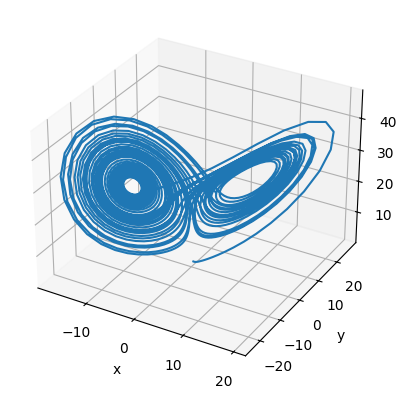

In [32]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
lorenz_plot, = ax.plot(x_sol, y_sol, z_sol) 

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()

A 3D plot is generated to visualize the trajectory of the Lorenz attractor in phase space (where $x$, $y$ and $z$ are the axes). The result is the characteristic butterfly-shaped structure, which illustrates the chaotic nature of the system. The `subplot_kw={'projection':'3d'}` keyword creates a 3D plot using matplotlib.

##### 3.8 Animating the results

In [33]:
def animate(frame):
    print(f"Progress: {(frame+1)/len(t_points):.2%} | 100.0 %", end='\r')

    ax.view_init(elev=10, azim=0.2*frame)

    x_current = x_sol[0:frame]
    y_current = y_sol[0:frame]
    z_current = z_sol[0:frame]

    lorenz_plot.set_data(x_current, y_current)
    lorenz_plot.set_3d_properties(z_current)

    ax.set_title(f"Lorenz Attractor | Progress: {(frame+1)/len(t_points):.2%}")

    return lorenz_plot,

MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:
plot_animation = FuncAnimation(
    fig=fig,
    func=animate,
    frames=range(1, len(t_points), 2),
    interval=20
    )

plot_animation.save("lorenz_attractor.gif")
plt.show()